<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#DBSCAN

In [2]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [4]:
from sklearn import preprocessing

data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [5]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


DBSCAN принимает следующие параметры:

1. metric: метрика расстояния, используемая для измерения расстояния между точками.
2. algorithm: алгоритм, используемый для вычисления ближайших соседей. Возможные значения: "auto", "ball_tree", "kd_tree" или "brute".
3. leaf_size: размер листа для алгоритмов ball_tree или kd_tree.
4. p: степень метрики Минковского (для метрики "minkowski").
5. n_jobs: количество параллельных задач, которые могут быть выполнены.
6. metric_params: дополнительные параметры, связанные с выбранной метрикой расстояния.

Таким образом, эти параметры позволяют настраивать DBSCAN, управлять выбором метрики расстояния, алгоритмом поиска ближайших соседей, размером листа, степенью метрики Минковского и другими настройками для оптимального выполнения кластеризации.

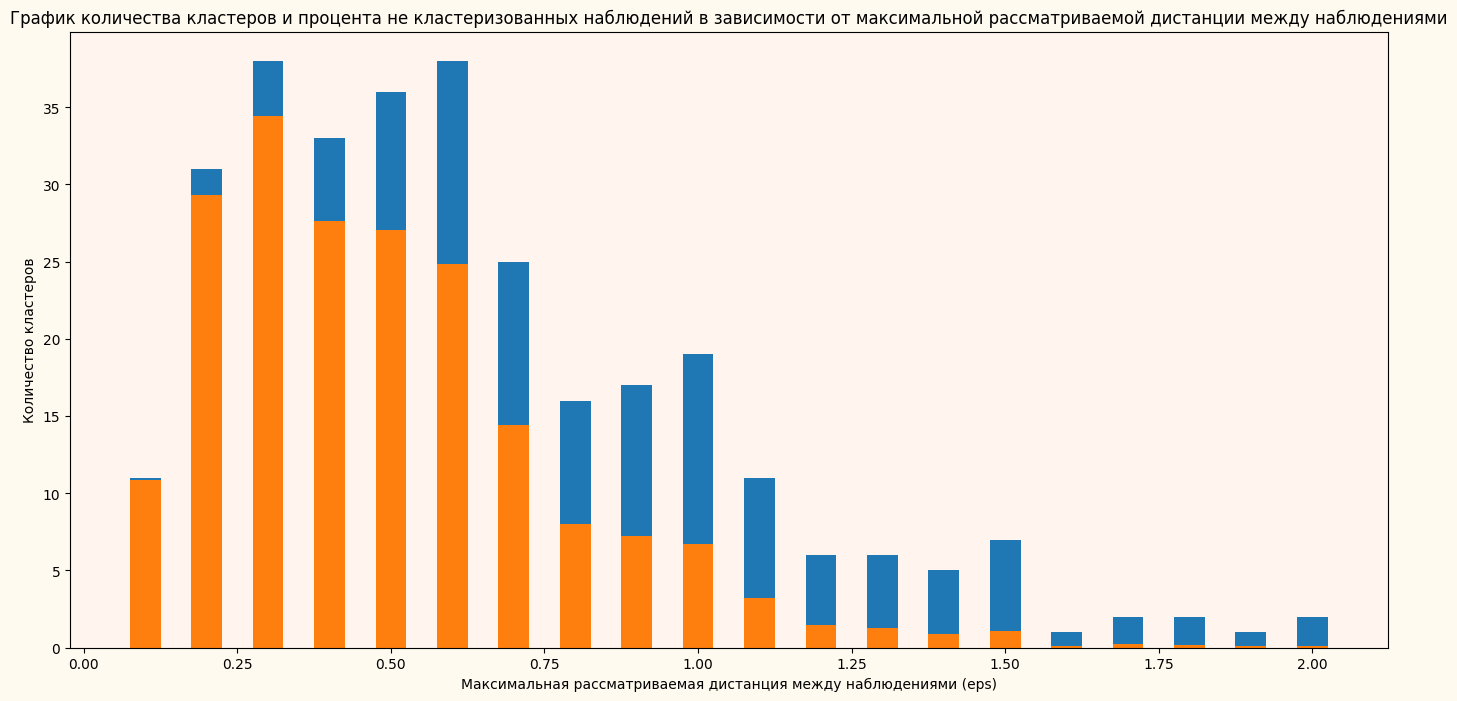

In [6]:
import matplotlib.pyplot as plt

max_eps = 0
eps_list = []
count_clusters = []
percent_not_clusters_labels = []

while max_eps <= 2:
    max_eps += 0.1
    eps_list.append(max_eps)
    clustering = DBSCAN(eps=max_eps).fit(scaled_data)
    count_clusters.append(len(set(clustering.labels_)) - 1)
    percent_not_clusters_labels.append(
        (len(set(clustering.labels_)) - 1) * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

fig, ax = plt.subplots(figsize=(17, 8))
ax.bar(eps_list, count_clusters, width=0.05)
ax.bar(eps_list, percent_not_clusters_labels, width=0.05)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

plt.xlabel('Максимальная рассматриваемая дистанция между наблюдениями (eps)')
plt.ylabel('Количество кластеров')
plt.title(
    label='График количества кластеров и процента не кластеризованных наблюдений в зависимости от максимальной рассматриваемой дистанции между наблюдениями',
    fontweight=12)

plt.show()

Процент не кластеризованных наблюдений от общего количества кластеров (синий столбец) отображается в оранжевом столбце.

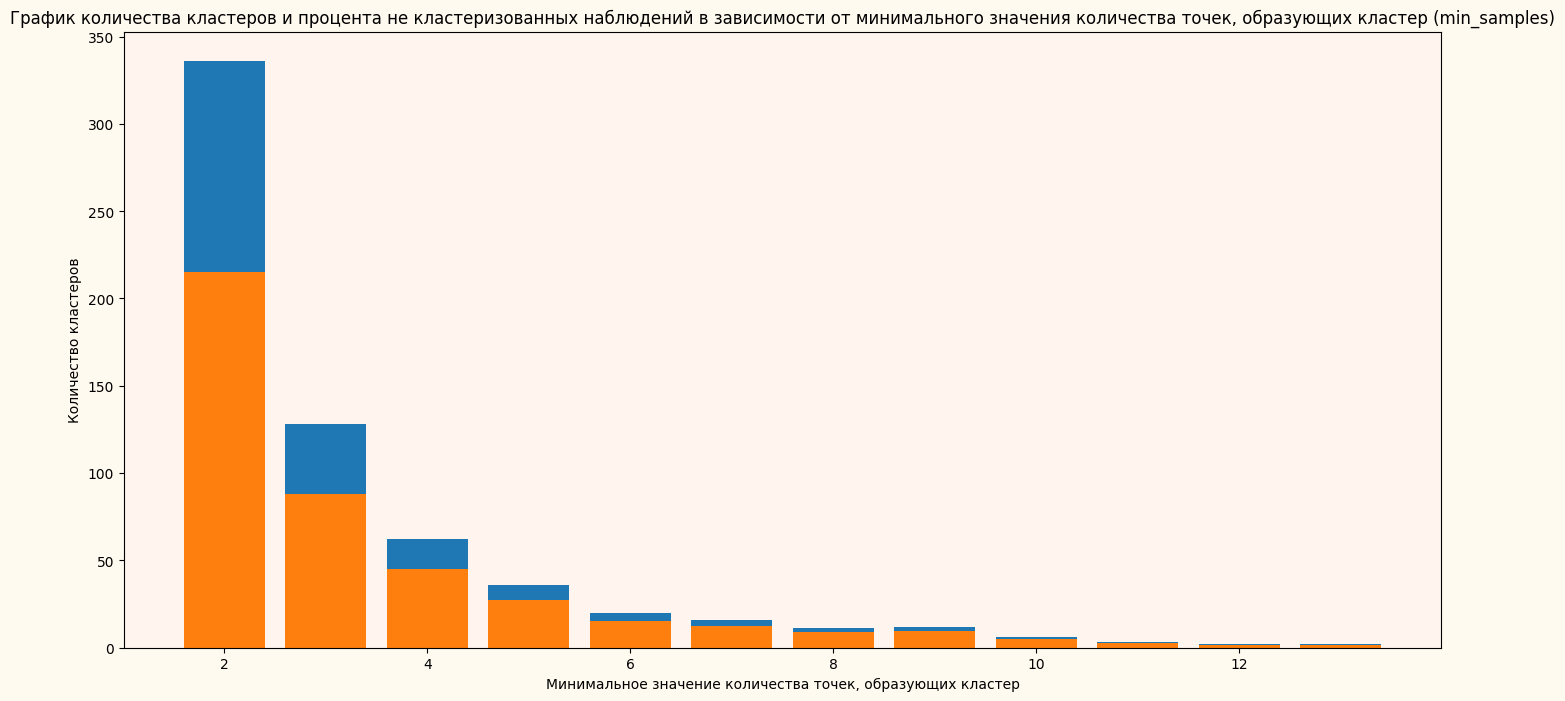

In [7]:
min_samples = 1
samples_min_list = []
count_clusters = []
percent_not_clusters_labels = []

while min_samples <= 12:
    min_samples += 1
    samples_min_list.append(min_samples)
    clustering = DBSCAN(min_samples=min_samples).fit(scaled_data)
    count_clusters.append(len(set(clustering.labels_)) - 1)
    percent_not_clusters_labels.append(
        (len(set(clustering.labels_)) - 1) * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

fig, ax = plt.subplots(figsize=(17, 8))
ax.bar(samples_min_list, count_clusters)
ax.bar(samples_min_list, percent_not_clusters_labels)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

plt.xlabel('Минимальное значение количества точек, образующих кластер')
plt.ylabel('Количество кластеров')
plt.title(
    label='График количества кластеров и процента не кластеризованных наблюдений в зависимости от минимального значения количества точек, образующих кластер (min_samples)',
    fontweight=12)

plt.show()

При eps = 2 и min_samples = 3

In [20]:
clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)

print('Количество кластеров:', len(set(clustering.labels_)) - 1)
print('Процент не кластеризованных:', '%.1f' % (list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100),'%')

Количество кластеров: 6
Процент не кластеризованных: 6.3 %


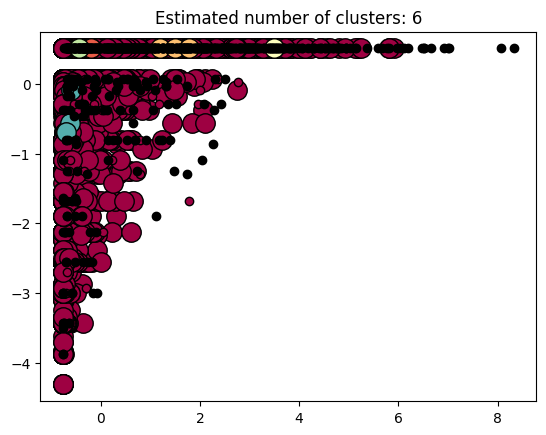

In [21]:
import warnings
import sys
import os

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_data)

clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.get_cmap("Spectral")(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = scaled_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14)

    xy = scaled_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Параметры, которые использует алгоритм OPTICS:

1. eps: радиус окрестности точки, где должно находиться минимальное количество точек (min_samples), чтобы эта точка считалась ядром кластера.
2. min_samples: минимальное количество точек в радиусе eps, чтобы точка считалась ядром кластера.
3. metric: метрика расстояния, используемая для измерения расстояния между точками.
4. cluster_method: метод кластеризации, который будет применяться после построения графа достижимости. Возможные значения: "xi" или "dbscan".
5. xi: параметр для метода "xi", который определяет минимальное изменение в плотности кластеров.
6. predecessor_correction: флаг, указывающий, следует ли использовать корректировку предшественника для определения максимального расстояния до ядра кластера.
7. min_cluster_size: минимальное количество точек в кластере.
8. max_eps: максимальный радиус окрестности, который будет использоваться при построении графа достижимости.
9. metric_params: дополнительные параметры метрики расстояния.

При max_eps = 2 и min_samples = 3

In [24]:
from sklearn.cluster import OPTICS

clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)

print('Количество кластеров:', len(set(clustering.labels_)) - 1)
print('Процент не кластеризованных:', '%.1f' % (list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100),'%')

Количество кластеров: 6
Процент не кластеризованных: 6.3 %


OPTICS метод позволяет анализировать плотность точек на всех уровнях без необходимости предварительно задавать значение eps, в отличие от DBSCAN, который работает только с локальной плотностью точек в радиусе eps. Однако стоит отметить, что OPTICS может быть более требовательным к ресурсам и использованию памяти при работе с большим количеством точек.

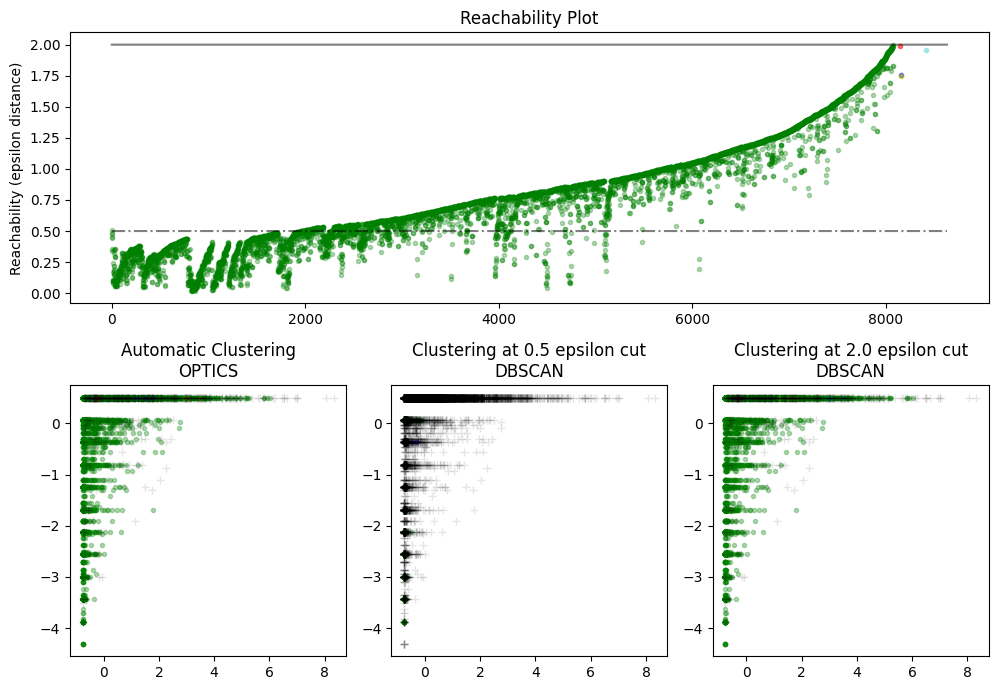

In [25]:
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec

labels_050 = cluster_optics_dbscan(
    reachability=clustering.reachability_,
    core_distances=clustering.core_distances_,
    ordering=clustering.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clustering.reachability_,
    core_distances=clustering.core_distances_,
    ordering=clustering.ordering_,
    eps=2,
)

space = np.arange(len(scaled_data))
reachability = clustering.reachability_[clustering.ordering_]
labels = clustering.labels_[clustering.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = scaled_data[clustering.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(scaled_data[clustering.labels_ == -1, 0], scaled_data[clustering.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = scaled_data[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(scaled_data[labels_050 == -1, 0], scaled_data[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = scaled_data[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(scaled_data[labels_200 == -1, 0], scaled_data[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

При max_eps = 2 и min_samples = 3

In [29]:
optic_metrics = ('cityblock', 'cosine', 'euclidean', 'l1', 'manhattan')
for metric in optic_metrics:
    clustering = OPTICS(max_eps=2, min_samples=3, metric=metric).fit(scaled_data)
    print(f'metric: {metric}')
    print('Количество кластеров:', len(set(clustering.labels_)) - 1)
    print('Процент не кластеризованных:', '%.1f' % (list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100),'%')
    print('------')

metric: cityblock
Количество кластеров: 370
Процент не кластеризованных: 80.9 %
------
metric: cosine
Количество кластеров: 620
Процент не кластеризованных: 67.7 %
------
metric: euclidean
Количество кластеров: 510
Процент не кластеризованных: 74.8 %
------
metric: l1
Количество кластеров: 370
Процент не кластеризованных: 80.9 %
------
metric: manhattan
Количество кластеров: 370
Процент не кластеризованных: 80.9 %
------
